# **Reorder a variable with ggplot2**

#### สร้างข้อมูล

In [15]:
# Library
library(ggplot2)
library(dplyr)

# Dataset 1: one value per group
data <- data.frame(
  name=c("north","south","south-east","north-west","south-west","north-east","west","east"),
  val=sample(seq(1,10), 8 )
)
 
# Dataset 2: several values per group (natively provided in R)
# mpg
data


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




name,val
<fct>,<int>
north,3
south,8
south-east,9
north-west,1
south-west,7
north-east,10
west,2
east,5


## **วิธีที่ 1 ใช้  Forecats library**

#### เป็น library ของ tidyverse เราสามารถจัดการข้อมูลด้วยฟังก์ชั่น **fct_reorder( )**

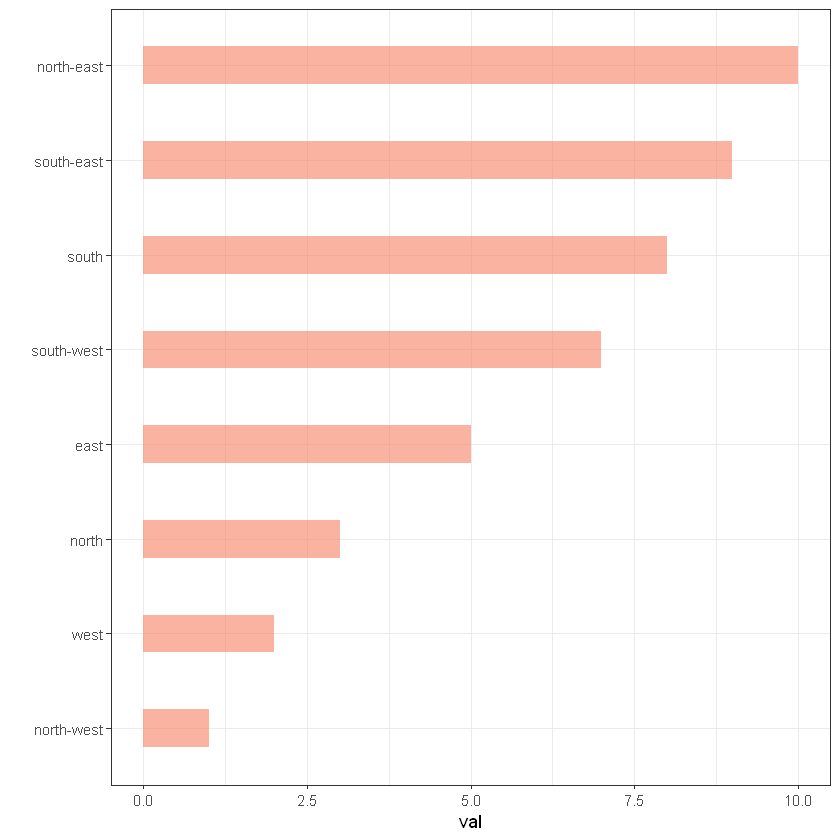

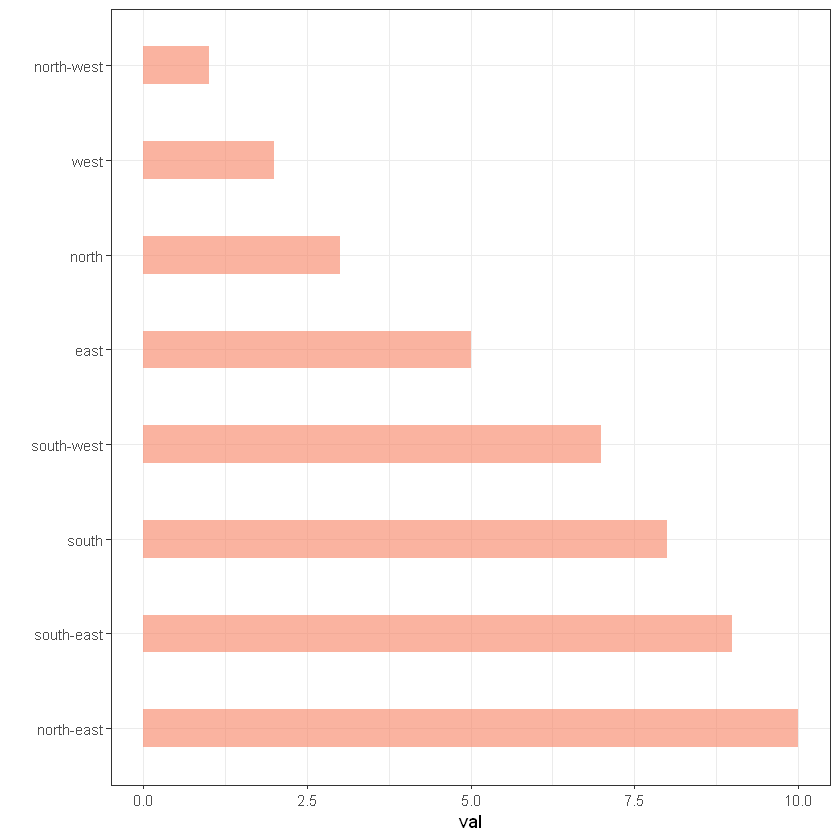

In [16]:
# load the library
library(forcats)

# Reorder following the value of another column:
r1 = data %>%
  mutate(name = fct_reorder(name, val)) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("") +
    theme_bw()
 
# Reverse side
r2 = data %>%
  mutate(name = fct_reorder(name, desc(val))) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("") +
    theme_bw()
r1
r2


#### ถ้าตัวแปรมีหลายค่า สามารถใช้วิธีกำหนดค่าได้ 2 วิธี

> #### 1) ใช้ค่า median  2) จำนวนตัวอย่างในกลุ่มข้อมูล

### **1) ใช้ค่า median**

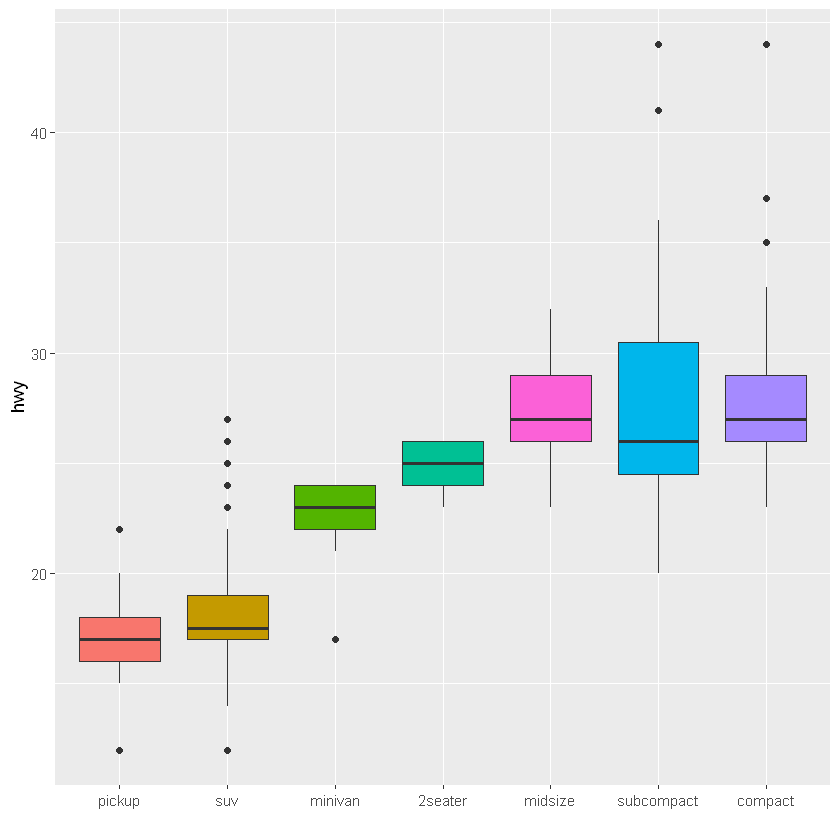

In [17]:
# Using median
mpg %>%
  mutate(class = fct_reorder(class, hwy, .fun='median')) %>%
  ggplot( aes(x=reorder(class, hwy), y=hwy, fill=class)) + 
    geom_boxplot() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("")
 

### **2) จำนวนตัวอย่างในกลุ่มข้อมูล**

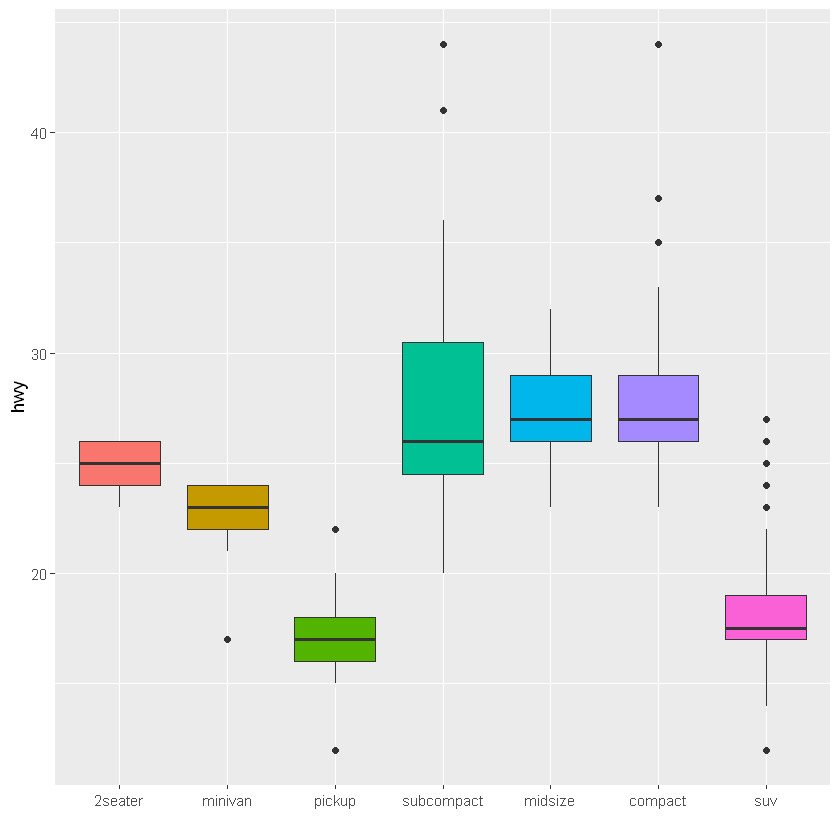

In [18]:
# Using number of observation per group
mpg %>%
  mutate(class = fct_reorder(class, hwy, .fun='length' )) %>%
  ggplot( aes(x=class, y=hwy, fill=class)) + 
    geom_boxplot() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("") +
    xlab("")

#### และยังมีการจัดการข้อมูลโดยแบ่ง level โดยใช้ฟังก์ชั่น **fct_releval( )**

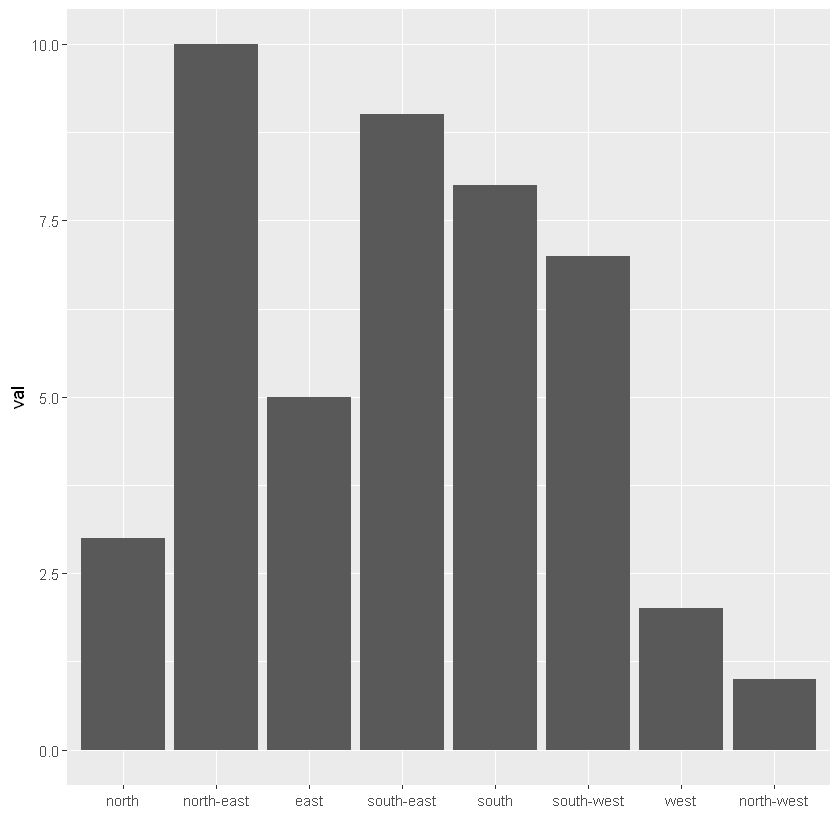

In [19]:
# Reorder following a precise order
p <- data %>%
  mutate(name = fct_relevel(name, 
            "north", "north-east", "east", 
            "south-east", "south", "south-west", 
            "west", "north-west")) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity") +
    xlab("")
p

## **วิธีที่ 2 ใช้  dplyr**

#### ใช้ฟังก์ชั่น **mutate( )** เพื่อสร้างตัวแปรใหม่หรือปรับเปลี่ยนตัวแปรเดิม ใช้สำหรับสร้างตัวแปรที่ต้องการคำสั่งเฉพาะ

#### มี 2 ขั้นตอน ดังนี้ 


>    #### 1) ใช้ฟังก์ชั่น **arrange( )** เพื่อจัดเรียงข้อมูลใน data frame และจัดข้อมูลตามที่ต้องการ

> #### 2) The second specifies a custom order for the factor giving the levels one by one

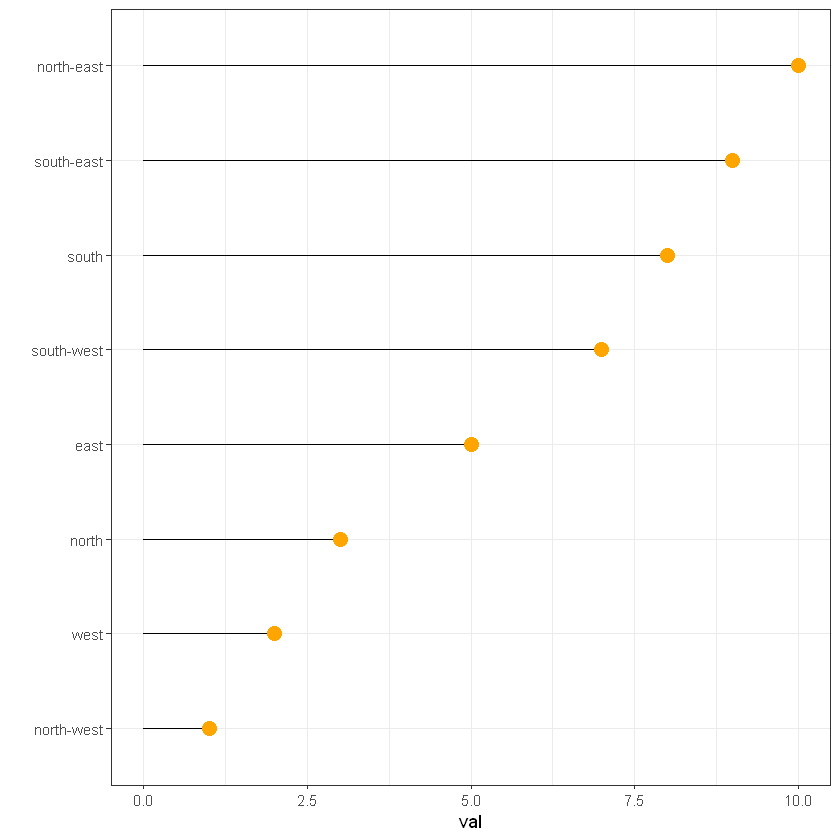

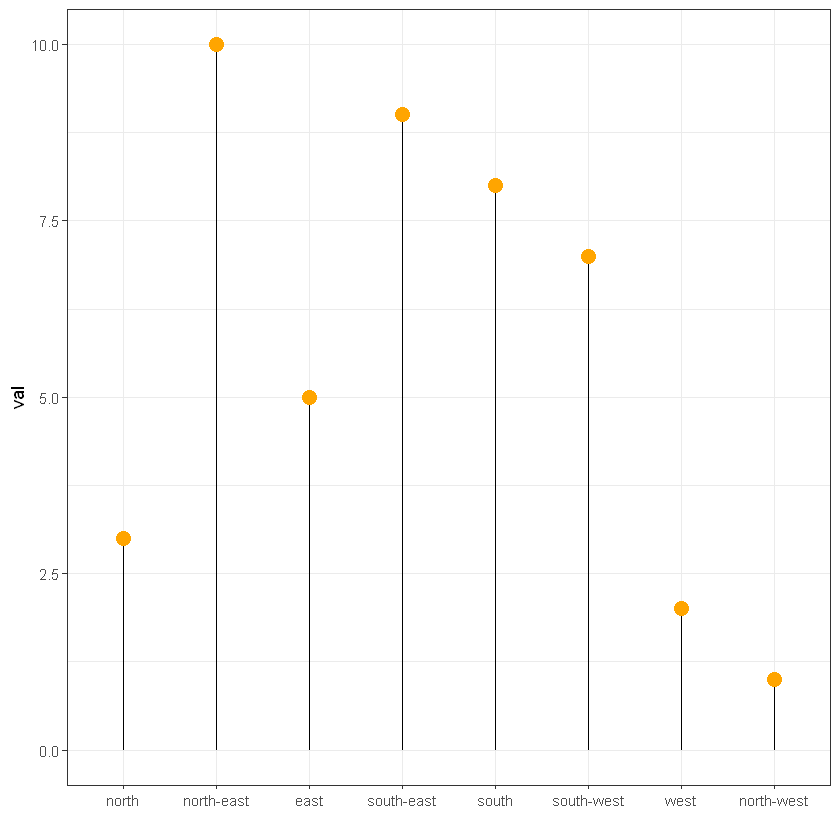

In [28]:
data %>%
  arrange(val) %>%    # First sort by val. This sort the dataframe but NOT the factor levels
  mutate(name=factor(name, levels=name)) %>%   # This trick update the factor levels
  ggplot( aes(x=name, y=val)) +
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="orange") +
    coord_flip() +
    theme_bw() +
    xlab("")
 
data %>%
  arrange(val) %>%
  mutate(name = factor(name, levels=c("north", "north-east", "east", "south-east", "south", "south-west", "west", "north-west"))) %>%
  ggplot( aes(x=name, y=val)) +
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="orange") +
    theme_bw() +
    xlab("")

## **วิธีที่ 3 ใช้ฟังก์ชั่น reorder( ) ของ base R**

> #### ใช้ฟังก์ชั่น **reorder( )** ใน **with( )**

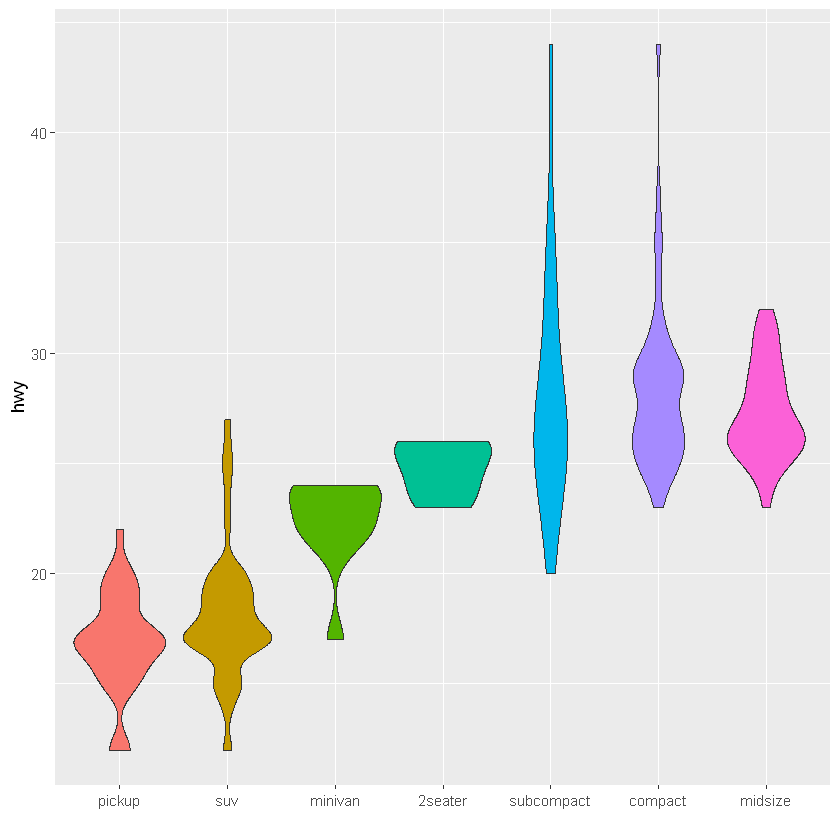

In [30]:
# reorder is close to order, but is made to change the order of the factor levels.
mpg$class = with(mpg, reorder(class, hwy, median))

p <- mpg %>%
  ggplot( aes(x=class, y=hwy, fill=class)) + 
    geom_violin() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("")
p